In [16]:
## This is to check the spectra from real correlator gain solutions and manual gain suppression:

workingdir='/home/tyndall/newburghlab-drone'
from dronehacks.GBO_Corr_Class import *
from dronehacks.Drone_Class import *

In [17]:
## Key, Position, Channel, Polarization, Pointing Variable Assignment:
## RECEIVER INFORMATION is needed to initialize the geometric environments: ##
## Must include some 'key' strings for labelling/identifying receivers: [Pranav's Conventions]
Array_Keys=["Dish_0","Dish_7","Dish_2","Dish_3","Dish_4","Dish_5","Dish_6","Dish_8"]
## Specify Coordinate Origin: #810m about MSL
GBO_HIRAX_DISH_0=pygeodesy.ellipsoidalNvector.LatLon(38.429280, -79.844990, 810).to3llh()
## Must Specify Coordinates and Pointings of receivers in Local Cartesian in an array of shape: n_receivers x 3 ##
Array_Coords=np.array([[0.0, 0.0, 0.0], # "Dish_0" \
                       [-24.215395745765452, -12.605737141316427, 0.0], # "Dish_7" \
                       [-8.403824760877617, 16.143597163843634, 0.0], # "Dish_2" \
                       [-8.071798581921817, -4.2019123804388085, 0.0], # "Dish_3" \
                       [-12.273710962360624, 3.869886201483008, 0.0], # "Dish_4" \
                       [-16.475623342799434, 11.941684783404824, 0.0], # "Dish_5" \
                       [-20.345509544282443, -0.33202617895580033, 0.0], # "Dish_6" \
                       [-28.41730812620426, -4.53393855939461, 0.0]]) # "Dish_8" \
## If pointings are defined by vectors in Local Coordinates (E,N,U) use:
Array_Pointings=np.array([[0,0,1], # +Z (up) in LC \
                          [0,0,1],\
                          [0,0,1],\
                          [0,0,1],\
                          [0,0,1],\
                          [0,0,1],\
                          [0,0,1],\
                          [0,0,1]])
## If pointings are defined by angles from zenith, use:
Array_Pointings=np.array([RotMat(np.array([0.0,0.0,0.0]))@np.array([0.0,0.0,1.0]),  # e.g. 1 deg of yaw and roll \
                          RotMat(np.array([0.0,0.0,0.0]))@np.array([0.0,0.0,1.0]),\
                          RotMat(np.array([0.0,0.0,0.0]))@np.array([0.0,0.0,1.0]),\
                          RotMat(np.array([0.0,0.0,0.0]))@np.array([0.0,0.0,1.0]),\
                          RotMat(np.array([0.0,0.0,0.0]))@np.array([0.0,0.0,1.0]),\
                          RotMat(np.array([0.0,0.0,0.0]))@np.array([0.0,0.0,1.0]),\
                          RotMat(np.array([0.0,0.0,0.0]))@np.array([0.0,0.0,1.0]),\
                          RotMat(np.array([0.0,0.0,0.0]))@np.array([0.0,0.0,1.0])])
## Define Array Polarizations (2 per dish) in Local Cartesian E,N,U:
Array_Pols=np.array([[[1,0,0],[0,1,0]], # E,N \
                     [[1,0,0],[0,1,0]], \
                     [[1,0,0],[0,1,0]], \
                     [[1,0,0],[0,1,0]], \
                     [[1,0,0],[0,1,0]], \
                     [[1,0,0],[0,1,0]], \
                     [[1,0,0],[0,1,0]], \
                     [[1,0,0],[0,1,0]]])

## 8 DISH PLOTTING:
GBO8_chmap=np.array([0,1,3,2,4,5,7,6,9,8,10,11,12,13,14,15])
GBO8_automap=np.array([0,  16,  45,  31,  58,  70,  91,  81, 108, 100, 115, 121, 126, 130, 133, 135])

In [523]:
## Pull a data set with real gains:
gaindir='/hirax/GBO_Data/Emilys_Rsync/digital_gains/20210824T151215Z_yale_drone_yale_digitalgain/'
datadir='/hirax/GBO_Data/Emilys_Rsync/20210824T151215Z_yale_drone/corr/20210824T151241Z/'

real_gains=Corr_Data(n_channels=8,\
                              chmap=GBO8_chmap,\
                              Data_Directory=datadir,\
                              Working_Directory=workingdir,\
                              #Data_File_Index=[0,1,2,3,4,5],\
                              Gain_Directory=gaindir)

Initializing Correlator Class using:
 --> /hirax/GBO_Data/Emilys_Rsync/20210824T151215Z_yale_drone/corr/20210824T151241Z/
 --> Arrays initialized with shape (104, 256, 1023, 8)
Assigning array values by reading in data files:
 --> Loading File: 0103/0103

In [524]:
## Pull a data set with manually suppressed gains:
gaindir='/hirax/GBO_Data/TONE_ACQ/digital_gains/20210825T185917Z_yale_drone_yale_digitalgain/'
datadir='/hirax/GBO_Data/TONE_ACQ/20210825T185917Z_yale_drone/corr/20210825T185959Z/'
manual_gains=Corr_Data(n_channels=8,\
                              chmap=GBO8_chmap,\
                              Data_Directory=datadir,\
                              Working_Directory=workingdir,\
                              #Data_File_Index=[0,1,2,3,4,5],\
                              Gain_Directory=gaindir)

Initializing Correlator Class using:
 --> /hirax/GBO_Data/TONE_ACQ/20210825T185917Z_yale_drone/corr/20210825T185959Z/
 --> Arrays initialized with shape (78, 256, 1023, 8)
Assigning array values by reading in data files:
 --> Loading File: 0075/0077Skipping file: 0075
 --> Loading File: 0076/0077Skipping file: 0076
 --> Loading File: 0077/0077Skipping file: 0077


In [525]:
## Pull a data set with manually suppressed gains after RTK moved away:
gaindir='/hirax/GBO_Data/TONE_ACQ/digital_gains/20210826T185621Z_yale_drone_yale_digitalgain/'
datadir='/hirax/GBO_Data/TONE_ACQ/20210826T185621Z_yale_drone/corr/20210826T185632Z/'
manual_gains_no_RTK=Corr_Data(n_channels=8,\
                              chmap=GBO8_chmap,\
                              Data_Directory=datadir,\
                              Working_Directory=workingdir,\
                              #Data_File_Index=[0,1,2,3,4,5],\
                              Gain_Directory=gaindir)

Initializing Correlator Class using:
 --> /hirax/GBO_Data/TONE_ACQ/20210826T185621Z_yale_drone/corr/20210826T185632Z/
 --> Arrays initialized with shape (97, 256, 1023, 8)
Assigning array values by reading in data files:
 --> Loading File: 0096/0096

In [526]:
## Pull a data set from Pranav's solar data to see what it looks like when there isn't an RTK anywhere:
gaindir='/hirax/GBO_Data/Solar_Data/20210716T160556Z_GBOc446/20210716T160556Z_GBOc446_digitalgain/'
datadir='/hirax/GBO_Data/Solar_Data/20210716T160556Z_GBOc446/corr/20210716T160656Z/'
solar_gains=Corr_Data(n_channels=8,\
                              chmap=GBO8_chmap,\
                              Data_Directory=datadir,\
                              Working_Directory=workingdir,\
                              #Data_File_Index=[0,1,2,3,4,5],\
                              Gain_Directory=gaindir)

Initializing Correlator Class using:
 --> /hirax/GBO_Data/Solar_Data/20210716T160556Z_GBOc446/corr/20210716T160656Z/
 --> Arrays initialized with shape (32, 256, 1023, 8)
Assigning array values by reading in data files:
 --> Loading File: 0031/0031

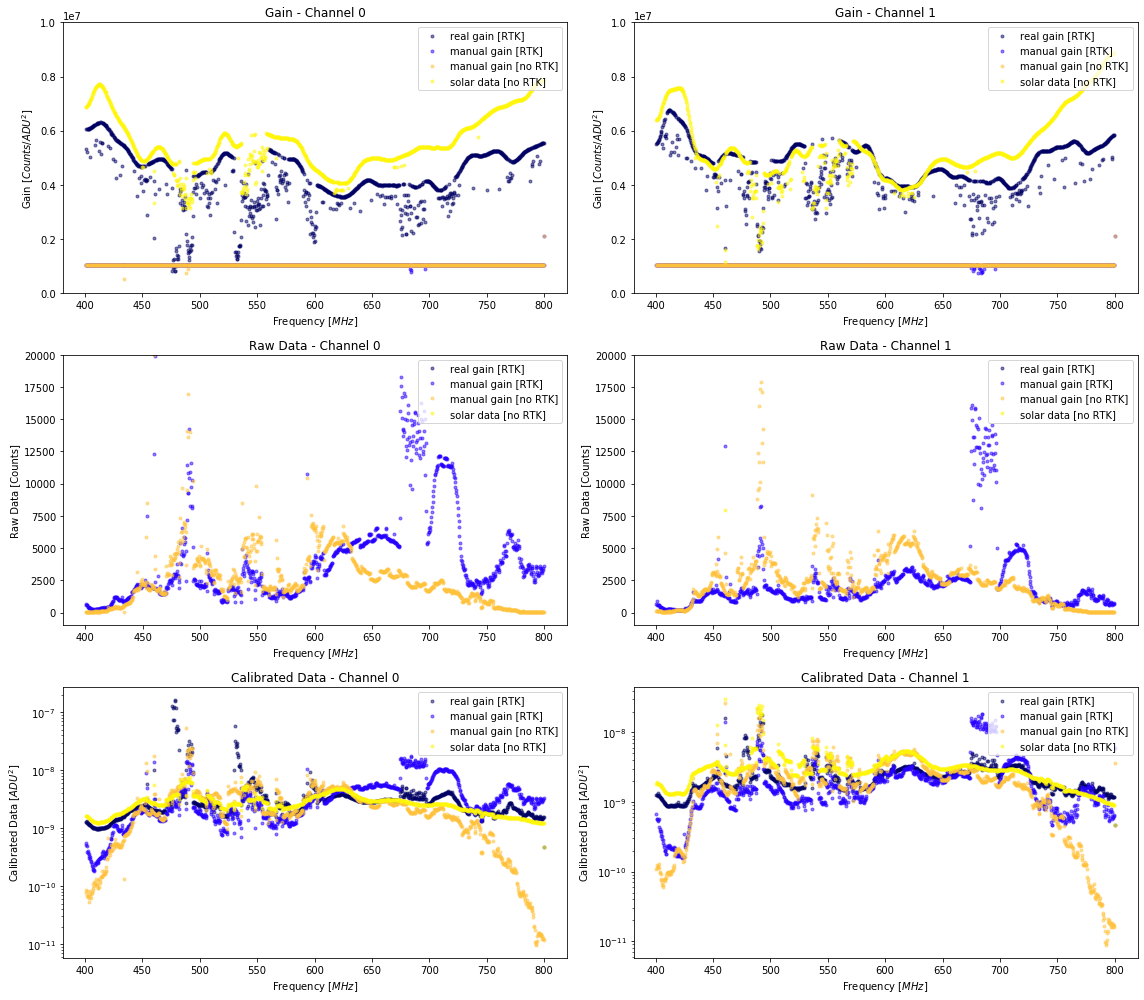

In [531]:
real_fd=h5py.File(real_gains.Data_Directory+real_gains.filenames[3], 'r')
real_vis=real_fd['vis'][:]
real_f=real_fd['index_map']['freq']['centre']

manual_fd=h5py.File(manual_gains.Data_Directory+manual_gains.filenames[3], 'r')
manual_vis=manual_fd['vis'][:]
manual_f=manual_fd['index_map']['freq']['centre']

manualnrtk_fd=h5py.File(manual_gains_no_RTK.Data_Directory+manual_gains_no_RTK.filenames[3], 'r')
manualnrtk_vis=manualnrtk_fd['vis'][:]
manualnrtk_f=manualnrtk_fd['index_map']['freq']['centre']

solar_fd=h5py.File(solar_gains.Data_Directory+solar_gains.filenames[3], 'r')
solar_vis=solar_fd['vis'][:]
solar_f=solar_fd['index_map']['freq']['centre']

fig1=figure(figsize=(16,14))
## GAINS:
plotchans=[0,1]
for i,key in enumerate(plotchans):
    ax=fig1.add_subplot(3,2,i+1)
    ax.plot(real_gains.freq,real_gains.gain[:,real_gains.chmap[key]],'.',c=colorsarr[1],alpha=0.5,label='real gain [RTK]')
    ax.plot(manual_gains.freq,manual_gains.gain[:,manual_gains.chmap[key]],'.',c=colorsarr[3],alpha=0.5,label='manual gain [RTK]')
    ax.plot(manual_gains_no_RTK.freq,manual_gains_no_RTK.gain[:,manual_gains_no_RTK.chmap[key]],'.',c=colorsarr[8],alpha=0.5,label='manual gain [no RTK]')
    ax.plot(solar_gains.freq,solar_gains.gain[:,solar_gains.chmap[key]],'.',c=colorsarr[9],alpha=0.5,label='solar data [no RTK]')
    ax.set_title("Gain - Channel {}".format(key))
    ax.set_ylabel("Gain [$Counts/ADU^2$]")
    ax.set_xlabel("Frequency [$MHz$]")
    ax.set_ylim(0,10000000)
    ax.legend(loc=1)
## RAW DATA:
for i,key in enumerate(plotchans):
    ax=fig1.add_subplot(3,2,i+3)
    ax.plot(real_f,np.nanmean(real_vis[:,:,real_gains.automap[key]].real,axis=0),'.',c=colorsarr[1],alpha=0.5,label='real gain [RTK]')
    ax.plot(manual_f,np.nanmean(manual_vis[:,:,manual_gains.automap[key]].real,axis=0),'.',c=colorsarr[3],alpha=0.5,label='manual gain [RTK]')
    ax.plot(manualnrtk_f,np.nanmean(manualnrtk_vis[:,:,manual_gains_no_RTK.automap[key]].real,axis=0),'.',c=colorsarr[8],alpha=0.5,label='manual gain [no RTK]')
    ax.plot(solar_f,(1/64.0)*np.nanmean(solar_vis[:,:,solar_gains.automap[key]].real,axis=0),'.',c=colorsarr[9],alpha=0.5,label='solar data [no RTK]')
    ax.set_title("Raw Data - Channel {}".format(key))
    ax.set_ylabel("Raw Data [Counts]")
    ax.set_xlabel("Frequency [$MHz$]")
    ax.set_ylim(-1000,20000)
    #ax.set_ylim(-10000,140000)
    ax.legend(loc=1)
## GAIN CALIBRATED DATA:
for i,key in enumerate(plotchans):
    ax=fig1.add_subplot(3,2,i+5)
    ax.semilogy(real_gains.freq,np.nanmean(real_gains.V_full[:100,:,key],axis=0),'.',c=colorsarr[1],alpha=0.5,label='real gain [RTK]')
    ax.semilogy(manual_gains.freq,np.nanmean(manual_gains.V_full[:100,:,key],axis=0),'.',c=colorsarr[3],alpha=0.5,label='manual gain [RTK]')
    ax.semilogy(manual_gains_no_RTK.freq,np.nanmean(manual_gains_no_RTK.V_full[:100,:,key],axis=0),'.',c=colorsarr[8],alpha=0.5,label='manual gain [no RTK]')
    ax.semilogy(solar_gains.freq,(1/64.0)*np.nanmean(solar_gains.V_full[:100,:,key],axis=0),'.',c=colorsarr[9],alpha=0.5,label='solar data [no RTK]')
    ax.set_title("Calibrated Data - Channel {}".format(key))
    ax.set_ylabel("Calibrated Data [$ADU^2$]")
    ax.set_xlabel("Frequency [$MHz$]")
    #ax.set_ylim(1e-11,1e-7)
    ax.legend(loc=1)
tight_layout()

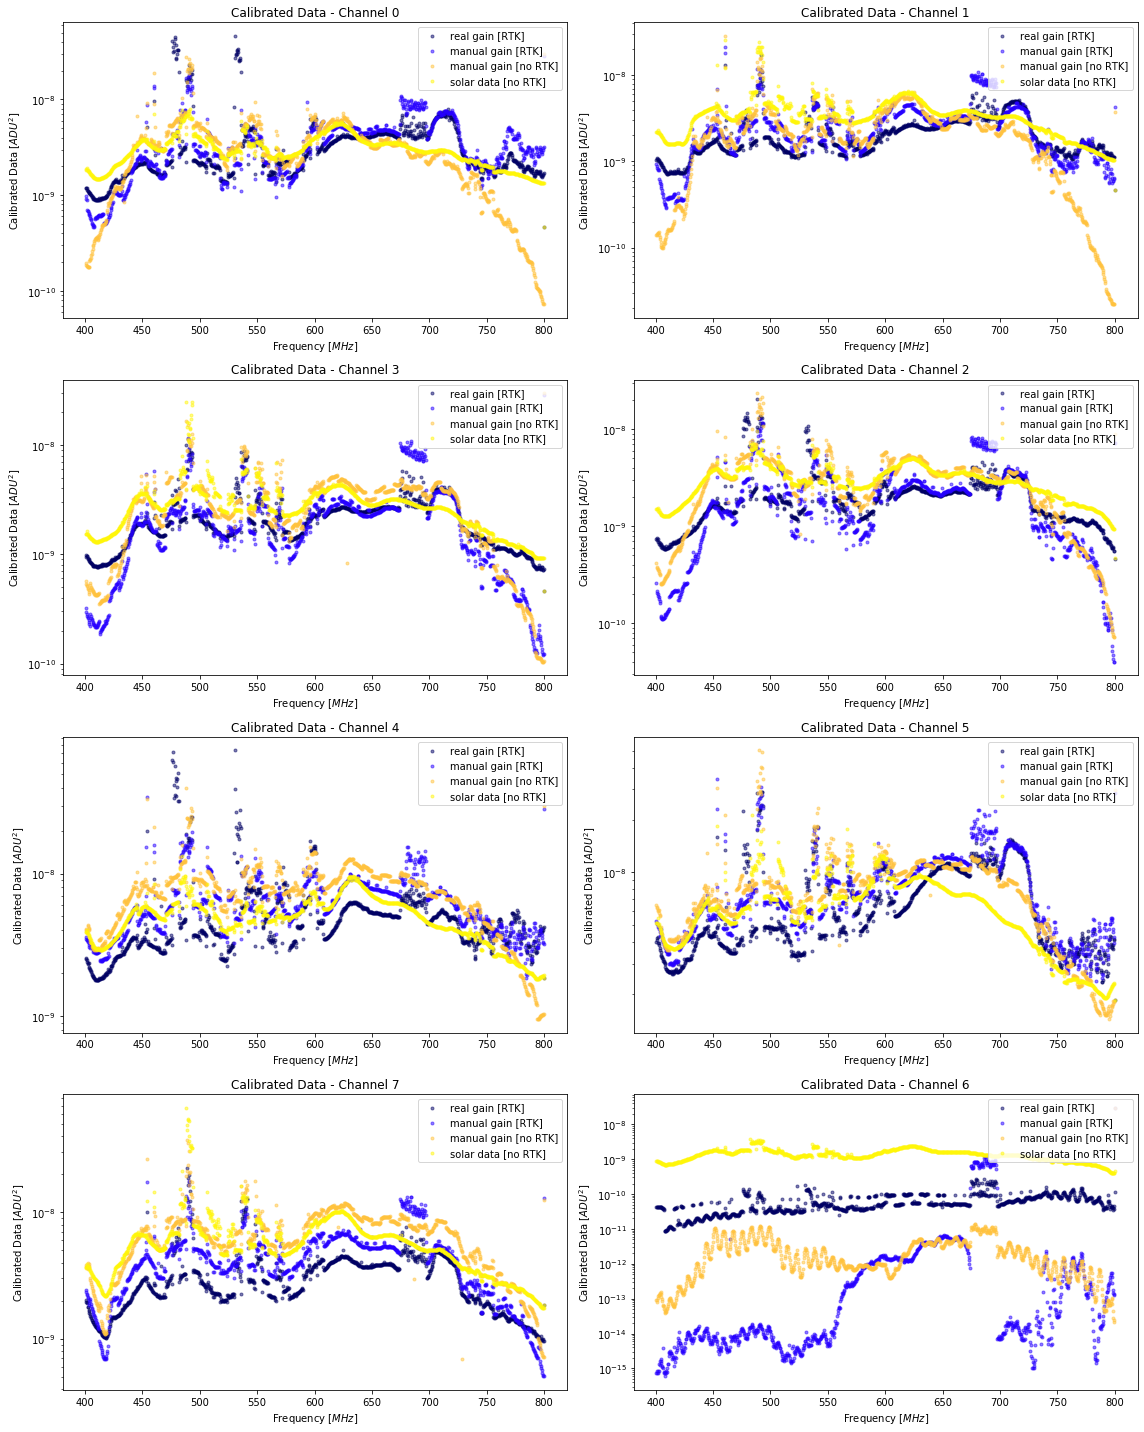

In [528]:
fig1=figure(figsize=(16,20))
for i,key in enumerate(real_gains.chmap):
    ax=fig1.add_subplot(4,2,i+1)
    ax.semilogy(real_gains.freq,np.nanmean(real_gains.V_full[:,:,key],axis=0),'.',c=colorsarr[1],alpha=0.5,label='real gain [RTK]')
    ax.semilogy(manual_gains.freq,np.nanmean(manual_gains.V_full[:,:,key],axis=0),'.',c=colorsarr[3],alpha=0.5,label='manual gain [RTK]')
    ax.semilogy(manual_gains_no_RTK.freq,np.nanmean(manual_gains_no_RTK.V_full[:,:,key],axis=0),'.',c=colorsarr[8],alpha=0.5,label='manual gain [no RTK]')
    ax.semilogy(solar_gains.freq,(1/64.0)*np.nanmean(solar_gains.V_full[:,:,key],axis=0),'.',c=colorsarr[9],alpha=0.5,label='solar data [no RTK]')
    ax.set_title("Calibrated Data - Channel {}".format(key))
    ax.set_ylabel("Calibrated Data [$ADU^2$]")
    ax.set_xlabel("Frequency [$MHz$]")
    #ax.set_ylim(0,8e6)
    ax.legend(loc=1)
tight_layout()

2.684332 0.041945 0.041461 63.99647156991298


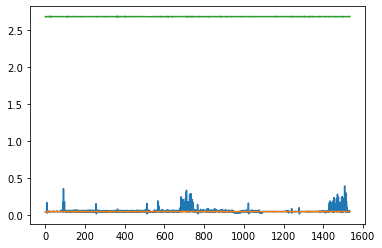

In [418]:
tdiff_real=[(real_gains.t_arr_datetime[k]-real_gains.t_arr_datetime[k-1]).total_seconds() for k in real_gains.t_index[1:]]
tdiff_manrtk=[(manual_gains_no_RTK.t_arr_datetime[k]-manual_gains_no_RTK.t_arr_datetime[k-1]).total_seconds() for k in manual_gains_no_RTK.t_index[1:]]
tdiff_solar=[(solar_gains.t_arr_datetime[k]-solar_gains.t_arr_datetime[k-1]).total_seconds() for k in solar_gains.t_index[1:]]
plot(tdiff_real)
plot(tdiff_manrtk)
plot(tdiff_solar)
print(np.nanmedian(tdiff_solar),np.nanmedian(tdiff_manrtk),np.nanmedian(tdiff_real),np.nanmedian(tdiff_solar)/np.nanmedian(tdiff_manrtk))


In [398]:
real_gains.prod[real_gains.automap]

array([(0, 0), (1, 1), (3, 3), (2, 2), (4, 4), (5, 5), (7, 7), (6, 6)],
      dtype=[('input_a', '<u2'), ('input_b', '<u2')])

In [399]:
real_gains.chmap

array([0, 1, 3, 2, 4, 5, 7, 6])

In [404]:
## Pull a data set with real gains:
gaindir='/hirax/GBO_Data/Emilys_Rsync/digital_gains/20210824T143047Z_yale_drone_yale_digitalgain/'
datadir='/hirax/GBO_Data/Emilys_Rsync/20210824T143047Z_yale_drone/corr/20210824T143114Z/'

test=Corr_Data(n_channels=2,\
                              chmap=GBO8_chmap,\
                              Data_Directory=datadir,\
                              Working_Directory=workingdir,\
                              Data_File_Index=[0,1,2,3,4,5],\
                              Gain_Directory=gaindir)

Initializing Correlator Class using:
 --> /hirax/GBO_Data/Emilys_Rsync/20210824T143047Z_yale_drone/corr/20210824T143114Z/
 --> Arrays initialized with shape (6, 256, 1023, 2)
Assigning array values by reading in data files:
 --> Loading File: 0005/0021

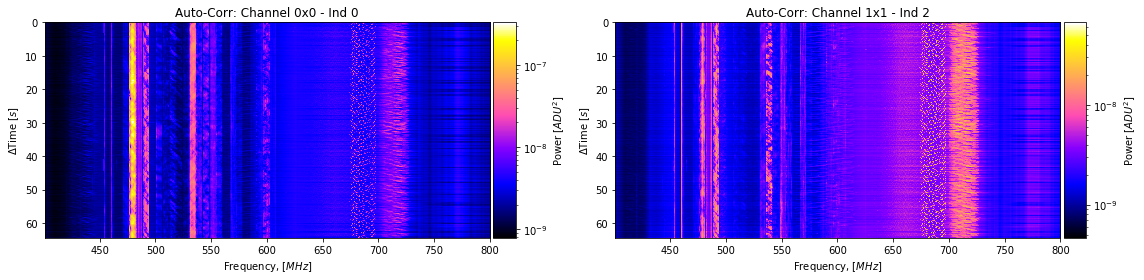

In [455]:
test.Plot_Auto_Corr_Waterfalls()

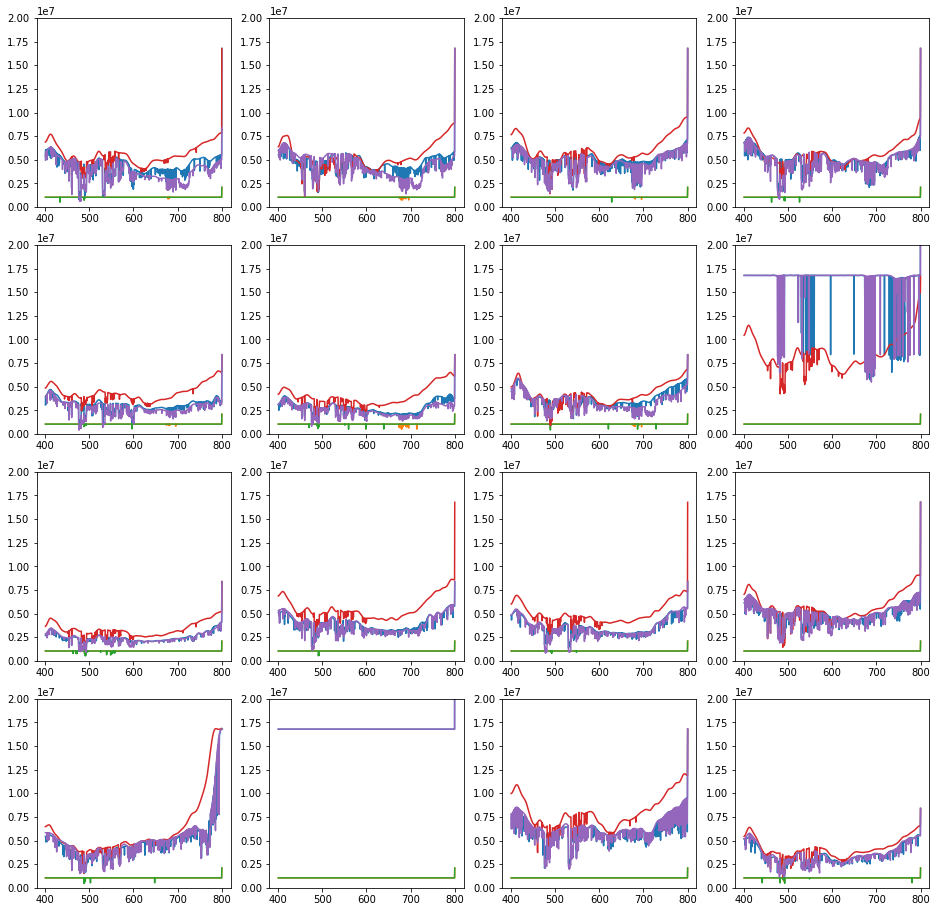

In [441]:
fig1=figure(figsize=(16,16))
for i,key in enumerate(range(16)):
    ax=fig1.add_subplot(4,4,i+1)
    ax.plot(real_gains.freq,real_gains.gain[:,key])
    ax.plot(manual_gains.freq,manual_gains.gain[:,key])
    ax.plot(manual_gains_no_RTK.freq,manual_gains_no_RTK.gain[:,key])
    ax.plot(solar_gains.freq,solar_gains.gain[:,key])
    ax.plot(test.freq,test.gain[:,key])
    ax.set_ylim(0,2e7)

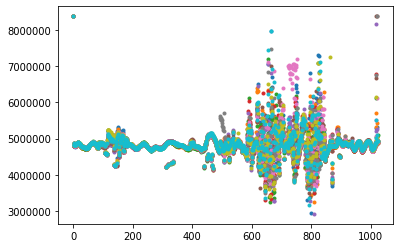

In [508]:
for w in range(10):
    #plot(manualnrtk_vis[24*w,:,0].real,'.')
    plot(solar_vis[24*w,:,0].real,'.')

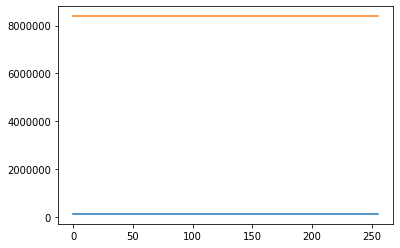

In [509]:
plot(manualnrtk_vis[:,0,0].real)
plot(solar_vis[:,0,0].real)

In [521]:
print(manualnrtk_vis[0,0,0].real+1)#/128
print(solar_vis[0,0,0].real+64)#/128

131072.0
8388608.0


In [505]:
0.042/1024*1000

0.041015625

In [502]:
2*(1/800000.)*16384

0.04096

In [503]:
16384/1024

16.0

In [517]:
8388545.0/131072.0
64*131072.0

8388608.0

In [522]:
8388608-8388544

64